In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.stats import norm, lognorm

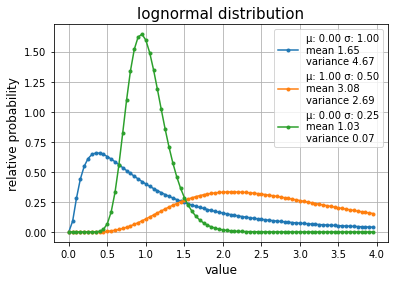

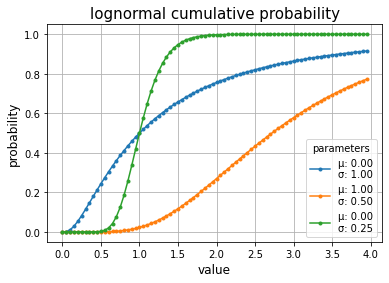

In [2]:
# log normal distribution - examples
# parameters [mu, sigma]
params_list = [[0.0, 1.0], [1.0, 0.5], [0.0, 0.25]]

# create range of values
delta_x = 0.05
x_values = np.arange(0.0, 4.0, delta_x)

for params in params_list:
    p_list = []
    p_mu = params[0]
    p_sigma = params[1]
    m, v = lognorm.stats(p_sigma, 0, np.exp(p_mu), moments='mv')
    for x in x_values:     
        p = lognorm.pdf(x, p_sigma, 0, np.exp(p_mu))
        p_list.append(p)
    plt.plot(x_values, p_list, marker='.', label=chr(956)+': {:.2f}'.format(p_mu)+' '+chr(963)+\
             ': {:.2f}'.format(p_sigma)+'\nmean {:.2f}\nvariance {:.2f}'.format(m, v))
    
plt.title('lognormal distribution', fontsize=15)
plt.legend(loc = 'upper right')
plt.ylabel('relative probability', fontsize=12)
plt.xlabel('value', fontsize=12)
plt.grid()
plt.savefig('lognorm_pdf.svg')
plt.show();

# CDF for lognormal distribution
for params in params_list:
    p_list = []
    for x in x_values:
        p = lognorm.cdf(x, params[1], 0, np.exp(params[0]))
        p_list.append(p)
    plt.plot(x_values, p_list, marker='.', label=chr(956)+': {:.2f}\n'\
             .format(params[0])+chr(963)+': {:.2f}'.format(params[1]))

plt.title('lognormal cumulative probability', fontsize=15)
plt.legend(title = 'parameters', loc = 'lower right')
plt.ylabel('probability', fontsize=12)
plt.xlabel('value', fontsize=12)
plt.grid()
plt.savefig('lognorm_cdf.svg')
plt.show();

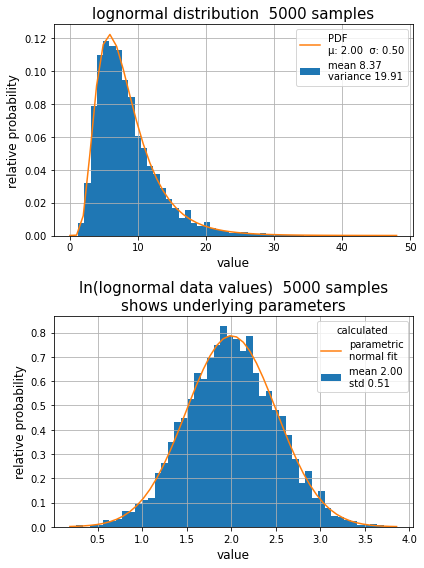

In [3]:
# use numpy lognormal to generate lognormal distribution
mu = 2
sigma = 0.5
samples = 5000
ln_dist = np.random.lognormal(mu, sigma, samples)

# get distribution mean and variance
m, v = lognorm.stats(sigma, 0, np.exp(mu), moments='mv')

fig, axs = plt.subplots(2, 1)
fig.set_size_inches(6.0, 8.0)

# plot histogram of samples
a0_vals = axs[0].hist(ln_dist, bins=50, density=True, label='mean {:.2f}\nvariance {:.2f}'.format(m, v))

# plot pdf function from scipy
# adjust range scale for maximum value in sample
x0_values = [x for x in np.linspace(0, math.ceil(max(a0_vals[1])), 50)]
probabilities0 = [lognorm.pdf(value, sigma, 0, np.exp(mu)) for value in x0_values]
axs[0].plot(x0_values, probabilities0, label='PDF\n'+chr(956)+': {:.2f}'\
        .format(mu)+'  '+chr(963)+': {:.2f}'.format(sigma))
            
axs[0].set_title('lognormal distribution  {:} samples'.format(samples), fontsize=15)
axs[0].set_xlabel('value', fontsize=12)
axs[0].set_ylabel('relative probability', fontsize=12)
axs[0].grid()
axs[0].legend()

# take ln() of data and compare
lnnorm_dist = np.log(ln_dist)# calculate parametric normal fit
mean_lnnorm = np.mean(lnnorm_dist)
std_lnnorm = np.std(lnnorm_dist)
para_fit = norm(mean_lnnorm, std_lnnorm)

# plot density histogram of log transformed data
a1_vals = axs[1].hist(lnnorm_dist, bins=50, density=True, label='mean {:.2f}\nstd {:.2f}'\
                     .format(mean_lnnorm, std_lnnorm))

# calculate range of values from histogram
x1_values = [value for value in np.linspace(min(a1_vals[1]), max(a1_vals[1]), 50)]
probabilities1 = [para_fit.pdf(value) for value in x1_values]
axs[1].plot(x1_values, probabilities1, label='parametric\nnormal fit')
axs[1].set_title('ln(lognormal data values)  {:} samples\nshows underlying parameters'.format(samples), fontsize=15)
axs[1].set_xlabel('value', fontsize=12)
axs[1].set_ylabel('relative probability', fontsize=12)
axs[1].grid()
axs[1].legend(title='calculated')
plt.tight_layout()
plt.savefig('lognorm_sample.svg')
plt.show();

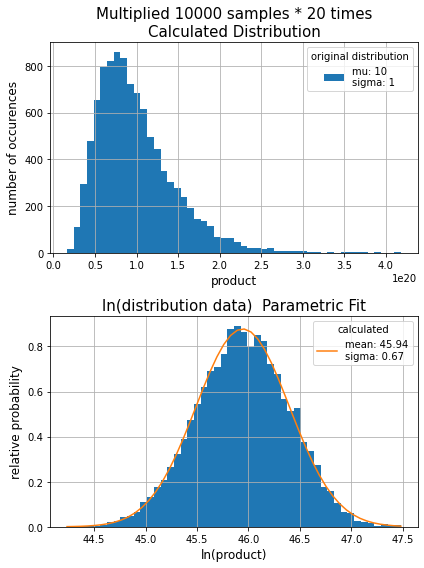

In [4]:
# log normal function
# product of many independent random variables
mu = 10   # can cause problems if values go below zero
sigma = 1
samples = 10000
number = 20
data_prod = np.ones([samples])
for n in range(number):
    data_prod = data_prod * np.array(np.random.normal(mu, sigma, samples))

fig, axs = plt.subplots(2, 1)
fig.set_size_inches(6.0, 8.0)

#plot histogram of product
axs[0].hist(data_prod, bins=50, label='mu: {:}\nsigma: {:}'.format(mu, sigma))
axs[0].set_title('Multiplied {:} samples * {:} times\nCalculated Distribution'.format(samples, number), fontsize=15)
axs[0].set_xlabel('product', fontsize=12)
axs[0].set_ylabel('number of occurences', fontsize=12)
axs[0].grid()
axs[0].legend(title='original distribution')

# plot histogram of log of product 
ln_data_prod = np.log(data_prod)
a1_vals = axs[1].hist(ln_data_prod, bins=50, density=True)
#axs[1].set_title('Multiplied {:} samples * {:} times\nln of product'.format(samples, number))
#axs[1].set_xlabel('ln(product)')
#axs[1].set_ylabel('number of occurences')
#axs[1].grid()

# calculate parametric normal fit and plot density histogram
mean_lndp = np.mean(ln_data_prod)
std_lndp = np.sqrt(np.var(ln_data_prod))
dist = norm(mean_lndp, std_lndp)

# calculate range of values from histogram
x1_values = [value for value in np.linspace(min(a1_vals[1]), max(a1_vals[1]), 50)]
probabilities = [dist.pdf(value) for value in x1_values]
axs[1].plot(x1_values, probabilities, label='mean: {:.2f}\nsigma: {:.2f}'\
            .format(mean_lndp, math.sqrt(std_lndp)))
axs[1].set_title('ln(distribution data)  Parametric Fit', fontsize=15)
axs[1].set_xlabel('ln(product)', fontsize=12)
axs[1].set_ylabel('relative probability', fontsize=12)
axs[1].legend(title='calculated')
axs[1].grid()
plt.tight_layout()
plt.savefig('lognorm_mult.svg')
plt.show();

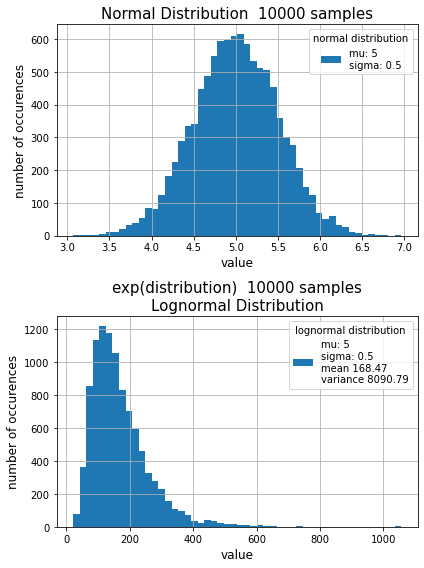

In [5]:
# create a lognormal distribution from normal distribution by exp(distribution)
mu = 5
sigma = .5
samples = 10000
#n_dist = norm(mu, sigma)
#probabilities = [n_dist.pdf(value) for value in values]
values = [value for value in range(int(mu - math.floor(4.*sigma)), int(mu + math.floor(4*sigma)))]
dist = np.random.normal(mu, sigma, samples)

fig, axs = plt.subplots(2, 1)
fig.set_size_inches(6.0, 8.0)

#normal distribution
axs[0].hist(dist, bins=50, label='mu: {:}\nsigma: {:}'.format(mu, sigma))
axs[0].set_title('Normal Distribution  {:} samples'.format(samples), fontsize=15)
axs[0].set_xlabel('value', fontsize=12)
axs[0].set_ylabel('number of occurences', fontsize=12)
axs[0].legend(title='normal distribution')
axs[0].grid()

exp_dist = np.exp(dist)
exp_mean = np.mean(exp_dist)
exp_var = np.var(exp_dist)

#plt.plot(exp_dist)
axs[1].hist(exp_dist, bins=50, label='mu: {:}\nsigma: {:}\nmean {:.2f}\nvariance {:.2f}'\
                                .format(mu, sigma, exp_mean, exp_var))
axs[1].set_title('exp(distribution)  {:} samples\nLognormal Distribution'.format(samples), fontsize=15)
axs[1].set_xlabel('value', fontsize=12)
axs[1].set_ylabel('number of occurences', fontsize=12)
axs[1].legend(title='lognormal distribution')
axs[1].grid()
plt.tight_layout()
plt.savefig('lognorm_exp.svg')
plt.show();